# Tensorflow

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "images/"

## Getting Started with Tensorflow

### Tensors

The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions. Here are some examples of tensors:

    + 3 # a rank 0 tensor; this is a scalar with shape []

    + [1., 2., 3.] # a rank 1 tensor; this is a vector with shape [3]

    + [[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]

    + [[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]


#### Importing TensorFlow

import tensorflow as tf

You might think of TensorFlow Core programs as consisting of two discrete sections:

    + Building the computational graph.
    + Running the computational graph.

A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Let's build a simple computational graph. Each node takes zero or more tensors as inputs and produces a tensor as an output. One type of node is a constant. Like all TensorFlow constants, it takes no inputs, and it outputs a value it stores internally. We can create two floating point Tensors node1 and node2 as follows:

   


### Constants

In [13]:
import tensorflow as tf
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const_2:0", shape=(), dtype=float32) Tensor("Const_3:0", shape=(), dtype=float32)


Notice that printing the nodes does not output the values 3.0 and 4.0 as you might expect. Instead, they are nodes that, when evaluated, would produce 3.0 and 4.0, respectively. To actually evaluate the nodes, we must run the computational graph within a session. A session encapsulates the control and state of the TensorFlow runtime.



### Create Session

The following code creates a Session object and then invokes its run method to run enough of the computational graph to evaluate node1 and node2. By running the computational graph in a session as follows:

In [14]:
sess = tf.Session()
print(sess.run([node1, node2]))


[3.0, 4.0]


We can build more complicated computations by combining Tensor nodes with operations (Operations are also nodes). For example, we can add our two constant nodes and produce a new graph as follows:

In [15]:
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


TensorFlow provides a utility called TensorBoard that can display a picture of the computational graph. Here is a screenshot showing how TensorBoard visualizes the graph:

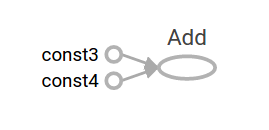

In [16]:
Image (filename= PATH + "getting_started_add.png")

### Placeholders

As it stands, this graph is not especially interesting because it always produces a constant result. A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later.

In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)


The preceding three lines are a bit like a function or a lambda in which we define two input parameters (a and b) and then an operation on them. We can evaluate this graph with multiple inputs by using the feed_dict argument to the run method to feed concrete values to the placeholders:

In [18]:
print(sess.run(adder_node, feed_dict= {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a:[1, 3], b: [2, 4]}))


7.5
[ 3.  7.]


In TensorBoard, the graph looks like this:

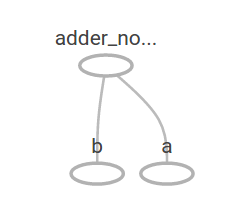

In [19]:
Image (filename= PATH + "getting_started_adder.png")

We can make the computational graph more complex by adding another operation. For example,

In [20]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))


22.5


The preceding computational graph would look as follows in TensorBoard:

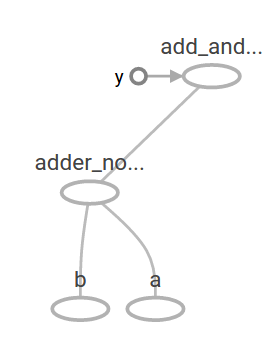

In [21]:
Image (filename= PATH + "getting_started_triple.png")

### Variables

In machine learning we will typically want a model that can take arbitrary inputs, such as the one above. To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. Variables allow us to add trainable parameters to a graph. They are constructed with a type and initial value:

In [22]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

### Model

In [24]:
x = tf.placeholder(tf.float32)
linear_model = W * x + b

### Initializing Variables

Constants are initialized when you call tf.constant, and their value can never change. By contrast, variables are not initialized when you call tf.Variable. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [25]:
init = tf.global_variables_initializer()
sess.run(init)


It is important to realize init is a handle to the TensorFlow sub-graph that initializes all the global variables. Until we call sess.run, the variables are uninitialized.

Since x is a placeholder, we can evaluate linear_model for several values of x simultaneously as follows:

In [26]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


We've created a model, but we don't know how good it is yet. To evaluate the model on training data, we need a y placeholder to provide the desired values, and we need to write a loss function.

### Cost-function to be optimized¶

A loss function measures how far apart the current model is from the provided data. We'll use a standard loss model for linear regression, which sums the squares of the deltas between the current model and the provided data. linear_model - y creates a vector where each element is the corresponding example's error delta. We call tf.square to square that error. Then, we sum all the squared errors to create a single scalar that abstracts the error of all examples using tf.reduce_sum:
\begin{eqnarray}  C(w,b) \equiv
   \sum_x \| LinearModel - y\|^2.
\tag{1}\end{eqnarray}


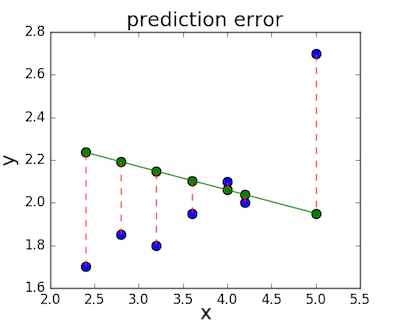

In [27]:
Image (filename= PATH  + "lin_reg_error.png")

In [28]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))


23.66


We could improve this manually by reassigning the values of W and b to the perfect values of -1 and 1. A variable is initialized to the value provided to tf.Variable but can be changed using operations like tf.assign. For example, W=-1 and b=1 are the optimal parameters for our model. We can change W and b accordingly:

In [29]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(squared_deltas, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))


[ 0.  0.  0.  0.]


## tf.train API

A complete discussion of machine learning is out of the scope of this tutorial. However, TensorFlow provides optimizers that slowly change each variable in order to minimize the loss function. The simplest optimizer is gradient descent. It modifies each variable according to the magnitude of the derivative of loss with respect to that variable. In general, computing symbolic derivatives manually is tedious and error-prone. Consequently, TensorFlow can automatically produce derivatives given only a description of the model using the function tf.gradients. For simplicity, optimizers typically do this for you. For example,

In [30]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(100):
    sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.84079814] b: [ 0.53192717] loss: 0.146364


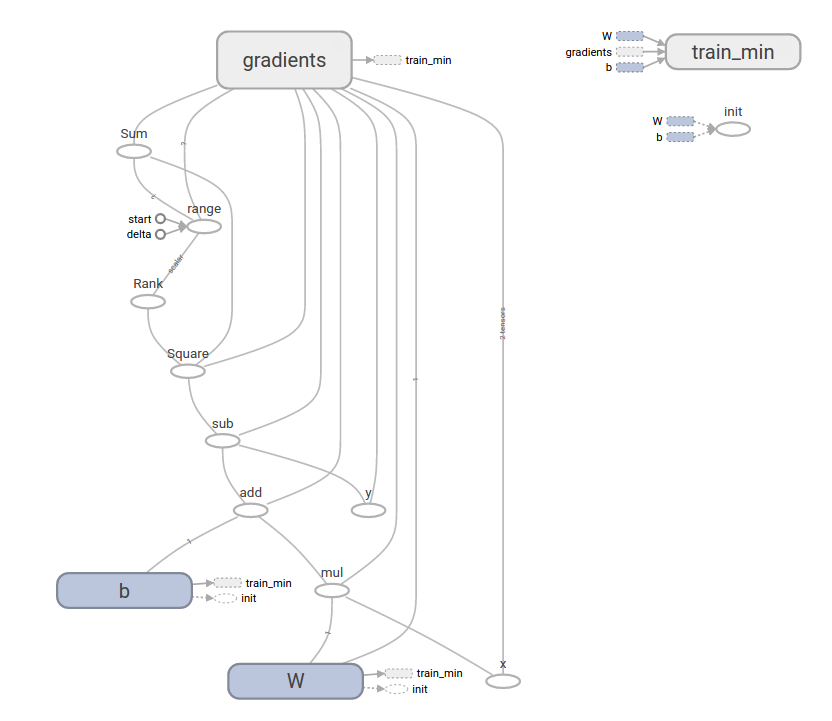

In [31]:
Image (filename= PATH + "getting_started_final.png")